# SIR model

This notebook contains code for runnning an SIR model for disease propagation.

We will use the Euler method to numerically sovle coupled first order ODE's for the SIR ODE model.

S = Susceptible, I = Infected, R = Recovered

$\frac{dS}{dt}=-SI\frac{q\beta}{N}$

$\frac{dI}{dt}=SI\frac{q\beta}{N}-\gamma I$

$\frac{dR}{dt}=\gamma I$

Here, $\beta$ represents the average number of people that come within infection range of an infected individual per day, which is given by $\frac{1}{\text{number of individuals}}$. $\gamma$ is the remove probability per day, which is given by $\frac{1}{\text{recovery time}}$. q is the mitigation factor due to quarantining (between 0 and 1), where 0 is perfect quarantine and 1 is no quarantine.

Below we import packages.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import math
import sys

Now we initialize parameters.

Time step in days:

In [2]:
dt = 0.01

Total time in days:

In [3]:
tottime = 365

Other parameters:

In [4]:
beta = 0.25 
gamma = 0.05 #20 days of infection
q = 1 #assumes no quarantine
N = 5E4

Initial population conditions:

In [5]:
pr = 0.0 #initial percent recovered (immune)
pi = 0.0001 #initial percent infected
ps = 1-pr-pi #initial percent susceptible

Initializing population arrays:

In [6]:
niter = int(math.ceil(tottime/dt))
t = np.arange(0, tottime, dt)
S = np.zeros(niter)
I = np.zeros(niter)
R = np.zeros(niter)

Applying initial population conditions:

In [7]:
S[0] = ps*N
I[0] = pi*N
R[0] = pr*N

Implementing Euler's method:

In [8]:
for j in range(niter-1):
    dSdt = -q*beta/N*S[j]*I[j]
    dIdt = q*beta/N*S[j]*I[j] - gamma*I[j]
    dRdt = gamma*I[j]
    S[j+1] = S[j] + dt*dSdt
    I[j+1] = I[j] + dt*dIdt
    R[j+1] = R[j] + dt*dRdt
N = S + I + R

Plotting:

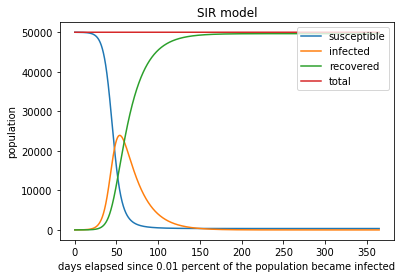

In [9]:
plt.plot(t, S)
plt.plot(t, I)
plt.plot(t, R)
plt.plot(t, N)
plt.legend(['susceptible', 'infected', 'recovered', 'total'], loc = 'upper right')
plt.title('SIR model')
plt.xlabel('days elapsed since 0.01 percent of the population became infected')
plt.ylabel('population')
plt.show()

# Sources:

https://www.davidketcheson.info/2020/03/19/SIR_Estimating_parameters.html

https://www.davidketcheson.info/2020/03/19/SIR_predictions.html

https://towardsdatascience.com/infectious-disease-modelling-beyond-the-basic-sir-model-216369c584c4

https://idmod.org/docs/malaria/model-sir.html